In [2]:
# For graphs
import matplotlib.pyplot as plt
# For number generation
import numpy as np
# For data analysis
import pandas as pd

# Basics

In [39]:
x = [np.linspace(0.0, 0.25), np.linspace(0.25, 0.5), np.linspace(0.5, 0.75), np.linspace(0.75, 1.0)]

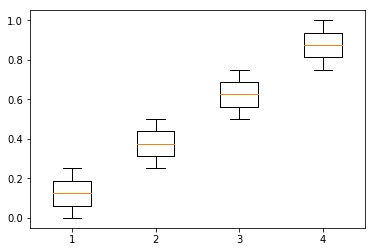

In [37]:
fig,ax = plt.subplots(1,1)
ax.boxplot(x);

# Playground

In [18]:
GROUPS = 5
BARS = 4

In [19]:
# generate some data
x = []
for i in range(0,BARS):
    x = x + [np.random.rand(10,GROUPS)]

In [20]:
COLS = ["red", "green", "blue", "orange"]
DIST = 7

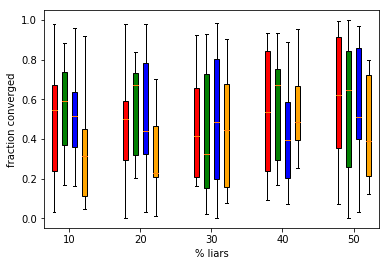

In [21]:
%matplotlib inline

def plotme(i):
    pos = []
    for j in range(0, GROUPS):
        pos = pos + [i+1 + j*DIST]
    ax.boxplot(x[i], positions=pos, patch_artist=True, boxprops=dict(facecolor=COLS[i]))
        
fig,ax = plt.subplots(1,1)

for i in range(0, BARS):
    plotme(i)

ax.set_xlim(0, DIST * (GROUPS-1) + BARS + 1)
xticks = []
xtickslbls = []
for i in range(0, GROUPS):
    xticks = xticks + [(BARS + 1.0) / 2.0 + i * DIST]
    xtickslbls = xtickslbls + [(i+1) * 10]
ax.set_xticks(xticks)
ax.set_xticklabels(xtickslbls)
ax.set_xlabel("% liars")
ax.set_ylabel("fraction converged");

# Data Analysis

- **Metrics**
    - Convergence time and Convergence fraction
- **Parameters**
    - $N = 10$
        1. **Basic: (table)**
            - Multiple robots with and without communication and with and whitout noise
            - Multiple robots with communication and liars with and without noise
                - Include liar fraction
                - Include all the liar strategies
                - We consider only comm step = 0
        2. **Filtering and communication step: (plot)**
            - Multiple robots with communication and liars with and without noise
            - Include liar fraction
            - Include all the liar strategies
            - Include all the filtering strategies
            - We consider comm steps > 0
    - $N = 50,100$
        3. **Scalability: (plot)**
            - Multiple robots with communication and liars with and without noise
            - Include liar fraction
            - Include all the liar strategies
            - Include all the filtering strategies
            - We consider comm steps > 0

# Convergence Time

## 10 Robots, No communication

In [8]:
# Read data
y = pd.read_csv("data_comm_step_inf.csv")

In [277]:
PARAM1 = [10,20,30]
PARAM2 = [100,200]
REPS = 5
x = pd.DataFrame(data = {
    'param1': np.repeat(PARAM1, len(PARAM2) * REPS),
    'param2': np.tile(np.repeat(PARAM2, REPS), len(PARAM1)),
    'success': np.tile(np.linspace(0.0, 1.0, REPS), len(PARAM1) * len(PARAM2))
})

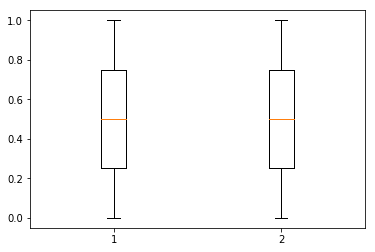

In [279]:
%matplotlib inline

fig,ax = plt.subplots(1,1)

for p1 in x.param1.unique():
    y = []
    for p2 in x.param2.unique():
        y = y + [x[(x.param1 == p1) & (x.param2 == p2)].success.values]
        ax.boxplot(y);